# 5 Modeling
##  * 5.1 Importing Data
##  * 5.2 Problem
##  * 5.3 Modeling
    * 5.3.1 Linear Regression
    * 5.3.2 Random Forest Regression
    * 5.3.3 Gradient Boosting Regression
##  * 5.4 Model Comparison
##  * 5.5 Final Selection and Reasoning

## 5.1 Importing Data

In [139]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [70]:
file = '../Capstone_Project2/clean_df.csv'
x_tr = '../Capstone_Project2/X_train.csv'
x_te = '../Capstone_Project2/X_test.csv'
y_tr = '../Capstone_Project2/y_train.csv'
y_te = '../Capstone_Project2/y_test.csv'
df = pd.read_csv(file)
X = df.loc[:, ~df.columns.isin(['Salary'])]
y = df.loc[:, 'Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

df

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,OBPM,DBPM,BPM,VORP,Salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Precious Achiuwa\achiupr01MIA,21,61,4,12.1,2.0,3.7,0.544,0.0,0.0,...,-3.6,-0.5,-4.1,-0.4,2711280,0,1,0,0,0
1,Steven Adams\adamsst01NOP,27,58,58,27.7,3.3,5.3,0.614,0.0,0.1,...,-0.4,0.1,-0.3,0.7,17073171,1,0,0,0,0
2,Bam Adebayo\adebaba01MIA,23,64,64,33.5,7.1,12.5,0.570,0.0,0.1,...,2.9,2.0,4.9,3.7,28103550,1,0,0,0,0
3,LaMarcus Aldridge\aldrila01SAS,35,21,18,25.9,5.5,11.8,0.464,1.3,3.6,...,-0.2,-0.2,-0.3,0.3,2641691,1,0,0,0,0
4,LaMarcus Aldridge\aldrila01BRK,35,5,5,26.0,5.0,9.6,0.521,0.8,1.0,...,-0.2,-0.2,-0.3,0.3,2641691,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,Delon Wright\wrighde01SAC,28,27,8,25.8,3.9,8.3,0.462,1.2,3.1,...,0.6,1.5,2.2,1.8,8526316,0,0,1,0,0
450,Thaddeus Young\youngth01CHI,32,68,23,24.3,5.4,9.7,0.559,0.2,0.7,...,1.9,1.4,3.3,2.2,14190000,0,1,0,0,0
451,Trae Young\youngtr01ATL,22,63,63,33.7,7.7,17.7,0.438,2.2,6.3,...,5.3,-1.7,3.7,3.0,8326471,0,0,1,0,0
452,Cody Zeller\zelleco01CHO,28,48,21,20.9,3.8,6.8,0.559,0.1,0.6,...,-0.2,-0.2,-0.5,0.4,2389641,1,0,0,0,0


In [71]:
players_list = ['Player']
players_train = X_train[players_list]
players_test = X_test[players_list]
X_train.drop(columns=players_list, inplace=True)
X_test.drop(columns=players_list, inplace=True)
X_train.shape, X_test.shape

((317, 51), (137, 51))

## 5.2 Problem Introduction

For this step of our capstone project, we want to create a few models to help us with the prediction of the salaries of players. We want to create four models that will help us to make the final prediction.

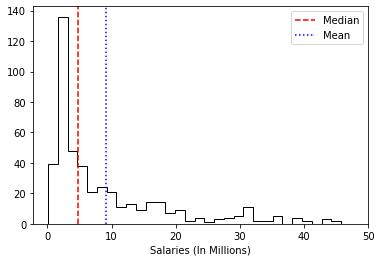

In [72]:
x = [0, 10000000, 20000000, 30000000, 40000000, 50000000]
_ = plt.figure()
_ = plt.hist(df.Salary, histtype='step', bins=30, color='black')
_ = plt.xlabel('Salaries (In Millions)')
_ = plt.xticks(x,['0', '10', '20', '30', '40', '50'])
_ = plt.axvline(df.Salary.median(), c='r', linestyle='--', label='Median')
_ = plt.axvline(df.Salary.mean(), c='b', linestyle=':', label='Mean')
_ = plt.legend(loc='upper right')

In [78]:
df.Salary.median()

4807075.5

In [79]:
df.Salary.mean()

9103413.046255507

## 5.3 Modeling

### 5.3.1 Linear Regression

Let's first start with a simple linear regression model and test its R2 score. Then, we want to use the Mean Absolute Error to examine the model performance. The reason why we are using MAE is that the NBA is prone to overpay or underpay their players, and someimes the performance of a player might surpass his corresponding salary, so we do not want to penalize the model with mean squared error. 

In [80]:
#Let's start with a simple linear regression, just to check the R2 scores.
#Data is already scaled with Standard Scaler in the last notebook
lr = LinearRegression()
lr.fit(X_train, y_train)
y_tr_pred_lr = lr.predict(X_train)
y_te_pred_lr = lr.predict(X_test)
median_r2_simple_lr = r2_score(y_train, y_tr_pred_lr), r2_score(y_test, y_te_pred_lr)
print(median_r2_simple_lr)

(0.7266936092889612, 0.6269387329105365)


We see that the R2 score is around 0.72 for the training set and 0.63 for the testing set. This is just a simplt linear regression model that we have for now. Later, we want to make a grid search to select the best parameters for our linear model.

In [81]:
#We will be using kbest as one of our parameters
k = [k+1 for k in range(len(X_train.columns))]
grid_params_lr = {'selectkbest__k': k}

In [82]:
#This is out pipeline
pipe_lr = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [83]:
lr_grid_cv = GridSearchCV(pipe_lr, param_grid=grid_params_lr, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fafd4b34940>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [84]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

<Figure size 432x288 with 0 Axes>

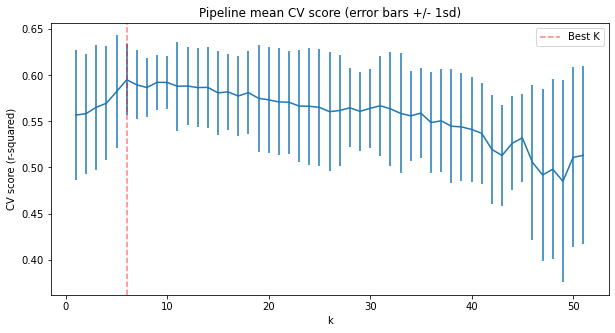

In [85]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
_ = plt.figure()
_ = plt.subplots(figsize=(10, 5))
_ = plt.errorbar(cv_k, score_mean, yerr=score_std)
_ = plt.axvline(x=best_k, c='r', ls='--', alpha=.5, label='Best K')
_ = plt.xlabel('k')
_ = plt.ylabel('CV score (r-squared)')
_ = plt.title('Pipeline mean CV score (error bars +/- 1sd)');
_ = plt.legend()

From the graph, we can see that the best k is 6. 

In [86]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

PTS     4.217837e+06
VORP    3.660904e+06
FGA     3.190136e+06
FT      2.273850e+06
FTA    -7.299060e+05
FG     -4.123424e+06
dtype: float64

With k equals to 6, our linear regression model with select k best parameters work the best. By looking at these features, we can see that for a basketball player, it seems like his average points and everything related to scoring might be more important than attributes like rebounds or assists.

Below is our best linear regression esrimators.

In [88]:
best_lr_estimator = lr_grid_cv.best_estimator_

## 5.3.2 Random Forest Regression

#### We want to create a pipeline with some parameters for the random forest regression models

In [120]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
param_grid_rf = {
    'standardscaler': [StandardScaler(), None],
    'randomforestregressor__max_depth': [80, 90, 100, 110],
    'randomforestregressor__bootstrap': [True, False],
    'randomforestregressor__min_samples_leaf': [3,4,5],
    'randomforestregressor__n_estimators': n_est}


In [121]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [122]:
pipeline_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)


rf_grid_cv = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__bootstrap': [True, False],
                         'randomforestregressor__max_depth': [80, 90, 100, 110],
                         'randomforestregressor__min_samples_leaf': [3, 4, 5],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                    

In [124]:
rf_grid_cv.best_params_

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 90,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__n_estimators': 69,
 'standardscaler': None}

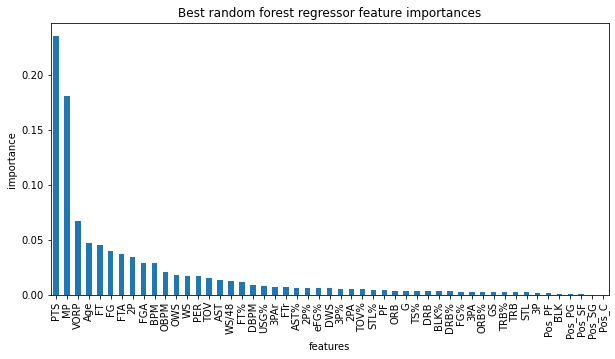

In [134]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [138]:
print("It seems like points is still a determining factor, but compared with our linear regression model, it seems liek minutes played and age played more important roles.")

It seems like points is still a determining factor, but compared with our linear regression model, it seems liek minutes played and age played more important roles.


In [136]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
np.mean(rf_best_scores)

0.6651182840692228

In [137]:
print("The number above is the mean of our random forest regressor's cv scores.")

The number above is the mean of our random forest regressor's cv scores.


### 5.3.3 Gradient Boosting Regressor

In [153]:
gbr = GradientBoostingRegressor()
pipeline_gbr = make_pipeline(
    StandardScaler(),
    gbr
)

param_grid_gbr = {
    'standardscaler': [StandardScaler(), None],
    "gradientboostingregressor__max_features": [3,4,5,6,7],
    "gradientboostingregressor__max_depth": [3,4,5],
    "gradientboostingregressor__n_estimators": n_est,
    "gradientboostingregressor__learning_rate": [0.001,0.01,0.1]
}

In [154]:
gbr.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [155]:
gbr_grid_cv = GridSearchCV(pipeline_gbr, param_grid=param_grid_gbr, cv=5, n_jobs=-1)
gbr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.001,
                                                                      0.01,
                                                                      0.1],
                         'gradientboostingregressor__max_depth': [3, 4, 5],
                         'gradientboostingregressor__max_features': [3, 4, 5, 6,
                                                                     7],
                         'gradientboostingregressor__n_estimators': [10, 12, 16,
                                                                     20, 26, 33,
                                                                     42, 54, 69,
                                     

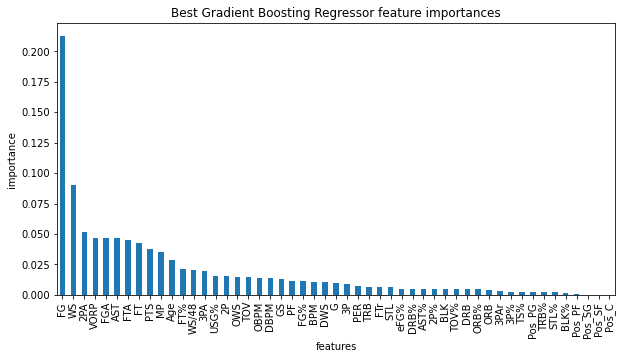

In [156]:
plt.subplots(figsize=(10, 5))
imps = gbr_grid_cv.best_estimator_.named_steps.gradientboostingregressor.feature_importances_
rgb_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rgb_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Gradient Boosting Regressor feature importances');

## 5.4 Model Comparison

### Since we already have the three models, we want to compare their performance to decide whether we want to keep these models or not. We want to compare their mean absolute errors for both the training and testing datasets to assess their performances

### 5.4.1 Performance for Linear Regression

In [173]:
lr_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
lr_mae_mean = np.mean(-1*lr_mae['test_score'])
lr_mae_std = np.std(-1*lr_mae['test_score'])
print("The mean for the mean absolute error for the training set is " + str(lr_mae_mean))
print("The std for the mean absolute error for the training set is " + str(lr_mae_std) + '.')
print("The mean absolute error is " + str(mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))) + ".")

The mean for the mean absolute error for the training set is 4313050.091084208
The std for the mean absolute error for the training set is 474921.4591796549.
The mean absolute error is 4331373.9628712265.


{'fit_time': array([0.0077951 , 0.00929093, 0.01141596, 0.00847101, 0.01025796]),
 'score_time': array([0.00251102, 0.00216889, 0.00422478, 0.00542736, 0.00409603]),
 'test_score': array([-3647657.72777885, -4676209.87637406, -4786849.64666894,
        -3831087.15912934, -4623446.04546985])}

In [ ]:
lr_mae_mean
lr_mae_std

### 5.4.2 Performance for Random Forest Regression

In [174]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
print("The mean for the mean absolute error for the training set is " + str(rf_mae_mean))
print("The std for the mean absolute error for the training set is " + str(rf_mae_std) + '.')
print("The mean absolute error is " + str(mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))) + ".")

The mean for the mean absolute error for the training set is 3769282.576796056
The std for the mean absolute error for the training set is 439739.1236694324.
The mean absolute error is 4016217.467434114.


### 5.4.3 Performance for Gradient Boostoing Regression

In [176]:
gbr_neg_mae = cross_validate(gbr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

gbr_mae_mean = np.mean(-1 * gbr_neg_mae['test_score'])
gbr_mae_std = np.std(-1 * gbr_neg_mae['test_score'])
print("The mean for the mean absolute error for the training set is " + str(gbr_mae_mean))
print("The std for the mean absolute error for the training set is " + str(gbr_mae_std) + '.')
print("The mean absolute error is " + str(mean_absolute_error(y_test, gbr_grid_cv.best_estimator_.predict(X_test))) + ".")

The mean for the mean absolute error for the training set is 3834261.6223604693
The std for the mean absolute error for the training set is 475313.33077093214.
The mean absolute error is 4077129.7357227975.


In [182]:
mean_mae_tr = [lr_mae_mean,rf_mae_mean,gbr_mae_mean]
std_mae_tr = [lr_mae_std,rf_mae_std,gbr_mae_std]
mae_te = [mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test)),mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test)),mean_absolute_error(y_test, gbr_grid_cv.best_estimator_.predict(X_test))]

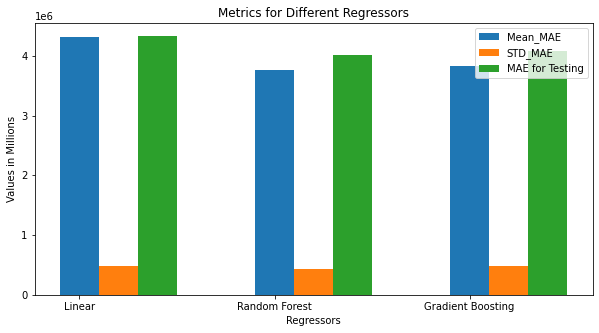

In [195]:
_ = plt.figure(figsize=(10,5))
index = [1,2,3]
_ = plt.bar([1, 2, 3], mean_mae_tr, width=0.2, label='Mean_MAE')
_ = plt.bar([1.2, 2.2, 3.2], std_mae_tr, width=0.2, label='STD_MAE')
_ = plt.bar([1.4, 2.4, 3.4], mae_te, width=0.2, label='MAE for Testing')
_ = plt.xlabel("Regressors")
_ = plt.ylabel("Values in Millions")
_ = plt.title("Metrics for Different Regressors")
_ = plt.xticks([1,2,3], ['Linear', 'Random Forest', 'Gradient Boosting'])
_ = plt.legend()


### 5.5 Final Model Selection and Reasoning

#### From the metrics we have chosen, it seems like Random Forest Regressor with its respective best parameters would outperform the other two models. It has the lowest mean and std for mean absolute error of the training set, and the mean absolute of the prediction from the testing data is the lowest among the three model as well. As a result, we will go with random forest regressor as our final model selection. Below is a graph showing the performance of the three models.